In [67]:
import numpy as np
import pandas as pd
import sklearn
import scipy

print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

1.26.4
2.2.2
1.7.2


In [68]:
import pandas as pd

file_path=r"C:\Users\ADMIN\Downloads\Life Expectancy Data.csv"
df=pd.read_csv(file_path)

In [69]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [70]:
df.shape
df.isna().sum().sort_values(ascending=False)

Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
 HIV/AIDS                            0
Country                              0
Year                                 0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
under-five deaths                    0
dtype: int64

In [71]:
import pandas as pd
import numpy as np

# Copy raw data
df_clean = df.copy()

# -----------------------------
# 1. Standardize column names
# -----------------------------
df_clean.columns = (
    df_clean.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("/", "_")
)

# -----------------------------
# 2. Replace impossible values
# -----------------------------
invalid_zero_cols = [
    "Life_expectancy", "GDP", "Population"
]

for col in invalid_zero_cols:
    df_clean[col] = df_clean[col].replace(0, np.nan)

# -----------------------------
# 3. Encode Status
# -----------------------------
df_clean["Status"] = df_clean["Status"].map({
    "Developing": 0,
    "Developed": 1
})

# -----------------------------
# 4. Country-wise median imputation
# -----------------------------
num_cols = df_clean.select_dtypes(include=["float64", "int64"]).columns

for col in num_cols:
    df_clean[col] = df_clean.groupby("Country")[col] \
                             .transform(lambda x: x.fillna(x.median()))

# -----------------------------
# 5. Global median fallback
# -----------------------------
df_clean[num_cols] = df_clean[num_cols].fillna(
    df_clean[num_cols].median()
)

In [72]:
df_clean.isna().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [73]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   int64  
 3   Life_expectancy                  2938 non-null   float64
 4   Adult_Mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

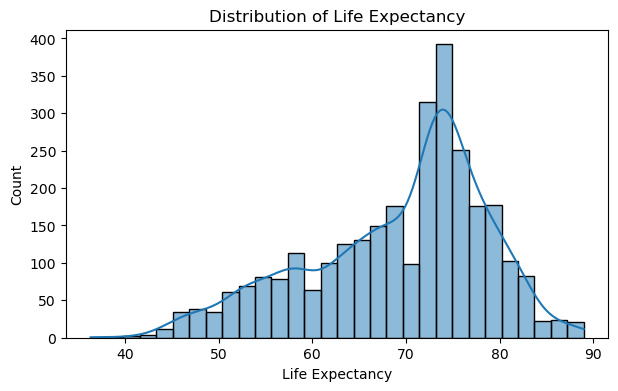

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.histplot(df_clean["Life_expectancy"], bins=30, kde=True)
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.show()

In [75]:
corr = df_clean.corr(numeric_only=True)

life_corr = corr["Life_expectancy"].sort_values(ascending=False)
life_corr

Life_expectancy                    1.000000
Schooling                          0.713054
Income_composition_of_resources    0.688662
BMI                                0.556901
Diphtheria                         0.484029
Status                             0.481415
Polio                              0.470517
GDP                                0.431460
Alcohol                            0.404035
percentage_expenditure             0.381418
Hepatitis_B                        0.300867
Total_expenditure                  0.226429
Year                               0.170819
Population                        -0.029014
Measles                           -0.157767
infant_deaths                     -0.196769
under-five_deaths                 -0.222738
thinness_5-9_years                -0.462473
thinness__1-19_years              -0.468002
HIV_AIDS                          -0.556703
Adult_Mortality                   -0.696390
Name: Life_expectancy, dtype: float64

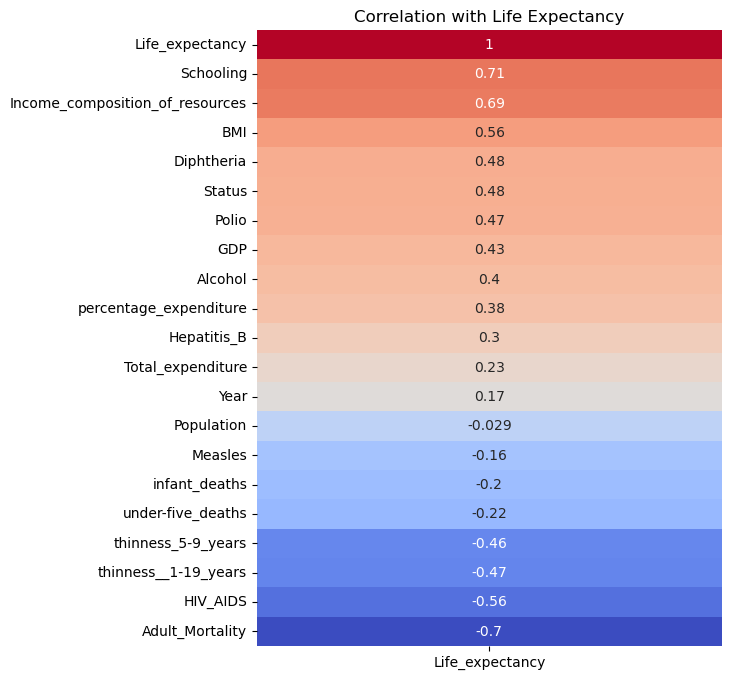

In [76]:
plt.figure(figsize=(6,8))
sns.heatmap(
    life_corr.to_frame(),
    annot=True,
    cmap="coolwarm",
    cbar=False
)
plt.title("Correlation with Life Expectancy")
plt.show()

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import pandas as pd

vif_features = df_clean.drop(
    columns=["Life_expectancy", "Country", "Year"]
)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(vif_features)

vif_df = pd.DataFrame()
vif_df["Feature"] = vif_features.columns
vif_df["VIF"] = [
    variance_inflation_factor(X_scaled, i)
    for i in range(X_scaled.shape[1])
]

vif_df.sort_values("VIF", ascending=False)

Feature         VIF
2                     infant_deaths  176.935429
8                 under-five_deaths  175.898068
16               thinness_5-9_years    8.881828
15             thinness__1-19_years    8.778487
13                              GDP    5.937103
4            percentage_expenditure    5.707207
18                        Schooling    3.379505
17  Income_composition_of_resources    3.012857
11                       Diphtheria    2.317837
9                             Polio    1.989462
3                           Alcohol    1.931812
0                            Status    1.926943
1                   Adult_Mortality    1.736731
7                               BMI    1.715480
5                       Hepatitis_B    1.621210
14                       Population    1.485376
12                         HIV_AIDS    1.425220
6                           Measles    1.376937
10                Total_expenditure    1.219684

In [78]:
df_model = df_clean.drop(
    columns=["infant_deaths", "under-five_deaths"]
)

In [79]:
vif_features_updated = df_model.drop(
    columns=["Life_expectancy", "Country", "Year"]
)

X_scaled = scaler.fit_transform(vif_features_updated)

vif_updated = pd.DataFrame()
vif_updated["Feature"] = vif_features_updated.columns
vif_updated["VIF"] = [
    variance_inflation_factor(X_scaled, i)
    for i in range(X_scaled.shape[1])
]

vif_updated.sort_values("VIF", ascending=False)

Feature       VIF
13             thinness__1-19_years  8.738675
14               thinness_5-9_years  8.735435
11                              GDP  5.927444
3            percentage_expenditure  5.705567
16                        Schooling  3.362723
15  Income_composition_of_resources  2.983048
9                        Diphtheria  2.285701
7                             Polio  1.981648
0                            Status  1.924768
2                           Alcohol  1.889780
1                   Adult_Mortality  1.732247
6                               BMI  1.711601
4                       Hepatitis_B  1.597584
10                         HIV_AIDS  1.416058
8                 Total_expenditure  1.219039
12                       Population  1.136245
5                           Measles  1.123590

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select features (exclude identifiers & target)
pca_features = df_model.drop(
    columns=["Life_expectancy", "Country", "Year"]
)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_features)

In [81]:
pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.32728961, 0.10844231, 0.09716177, 0.07861102, 0.06655003,
       0.04904397, 0.04705972, 0.04520181, 0.03867384, 0.02950203,
       0.02786115, 0.02520495, 0.02119604, 0.01799654, 0.01129548,
       0.00536125, 0.00354847])

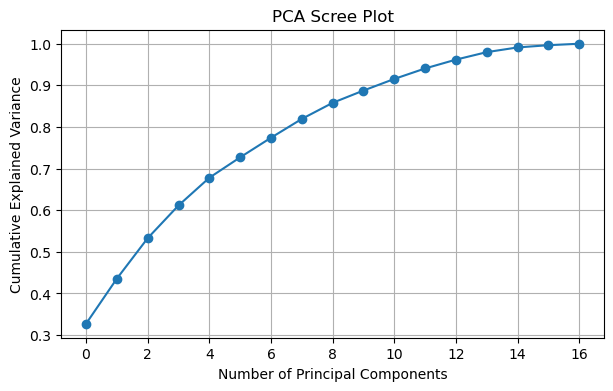

In [82]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(
    np.cumsum(explained_variance),
    marker="o"
)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot")
plt.grid()
plt.show()

In [83]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(pca.components_))],
    index=pca_features.columns
)

loadings.iloc[:, :3]

PC1       PC2       PC3
Status                           0.281368 -0.208453  0.097451
Adult_Mortality                 -0.241684 -0.083691 -0.134104
Alcohol                          0.266503 -0.183060 -0.019262
percentage_expenditure           0.239354 -0.363649  0.306652
Hepatitis_B                      0.162097  0.483167  0.086226
Measles                         -0.099156 -0.104135  0.309139
BMI                              0.281036  0.013677 -0.174884
Polio                            0.227564  0.429967  0.149501
Total_expenditure                0.162787 -0.056867 -0.160893
Diphtheria                       0.231317  0.462320  0.152200
HIV_AIDS                        -0.148761 -0.122781 -0.074002
GDP                              0.254729 -0.322882  0.318337
Population                      -0.059442 -0.045128  0.396669
thinness__1-19_years            -0.297273  0.089037  0.433363
thinness_5-9_years              -0.296256  0.090103  0.434421
Income_composition_of_resources  0.323164 -0.004197  0.141445
Schooling                        0.340737  0.006019  0.111496

In [84]:
from scipy.stats import f_oneway

# Separate life expectancy by Status
life_dev = df_model[df_model["Status"] == 1]["Life_expectancy"]
life_devp = df_model[df_model["Status"] == 0]["Life_expectancy"]

In [85]:
f_stat, p_value = f_oneway(life_dev, life_devp)
f_stat, p_value

(885.7231109248446, 2.479518401405743e-170)

In [87]:
life_dev.mean(), life_devp.mean()

(79.1978515625, 67.13202802967848)

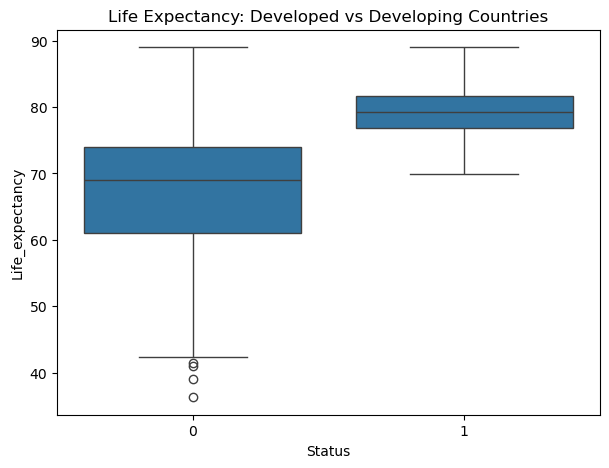

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.boxplot(data=df_model, x="Status", y="Life_expectancy")
plt.title("Life Expectancy: Developed vs Developing Countries")
plt.show()

In [89]:
latest_year = df_model["Year"].max()
df_latest = df_model[df_model["Year"] == latest_year].copy()

df_latest.shape

(183, 20)

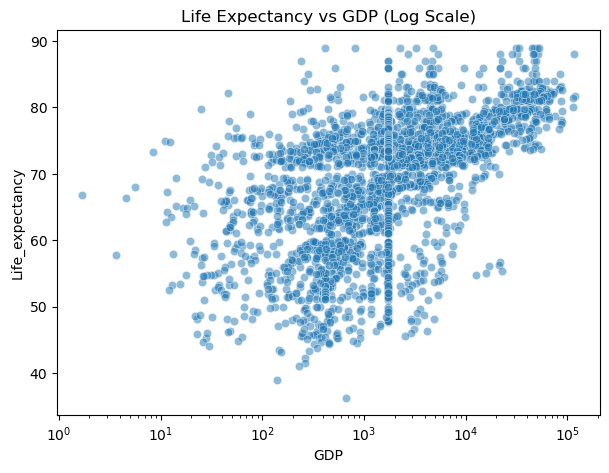

In [90]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_model, x="GDP", y="Life_expectancy", alpha=0.5)
plt.xscale("log")
plt.title("Life Expectancy vs GDP (Log Scale)")
plt.show()

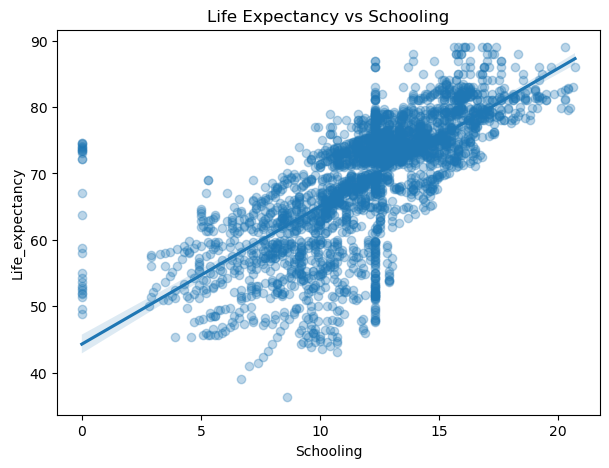

In [25]:
plt.figure(figsize=(7,5))
sns.regplot(data=df_model, x="Schooling", y="Life_expectancy", scatter_kws={'alpha':0.3})
plt.title("Life Expectancy vs Schooling")
plt.show()

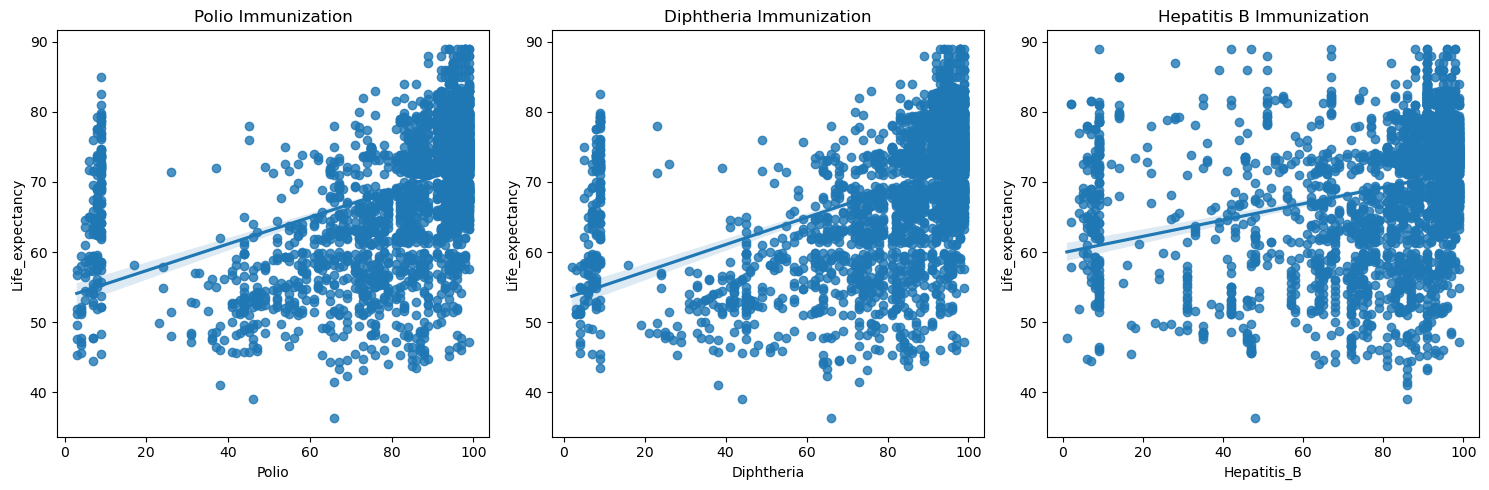

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.regplot(data=df_model, x="Polio", y="Life_expectancy", ax=axes[0])
axes[0].set_title("Polio Immunization")

sns.regplot(data=df_model, x="Diphtheria", y="Life_expectancy", ax=axes[1])
axes[1].set_title("Diphtheria Immunization")

sns.regplot(data=df_model, x="Hepatitis_B", y="Life_expectancy", ax=axes[2])
axes[2].set_title("Hepatitis B Immunization")

plt.tight_layout()
plt.show()

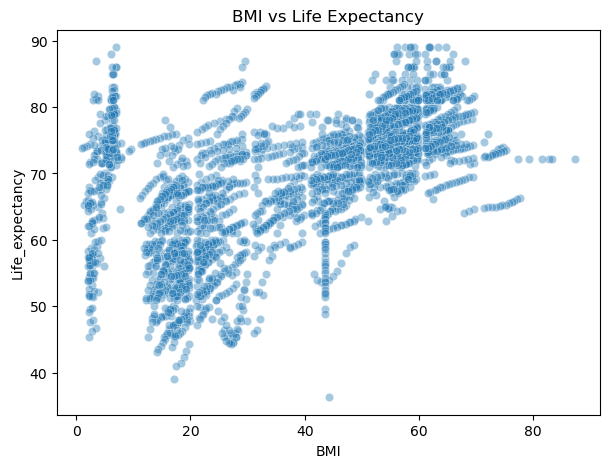

In [92]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_model, x="BMI", y="Life_expectancy", alpha=0.4)
plt.title("BMI vs Life Expectancy")
plt.show()

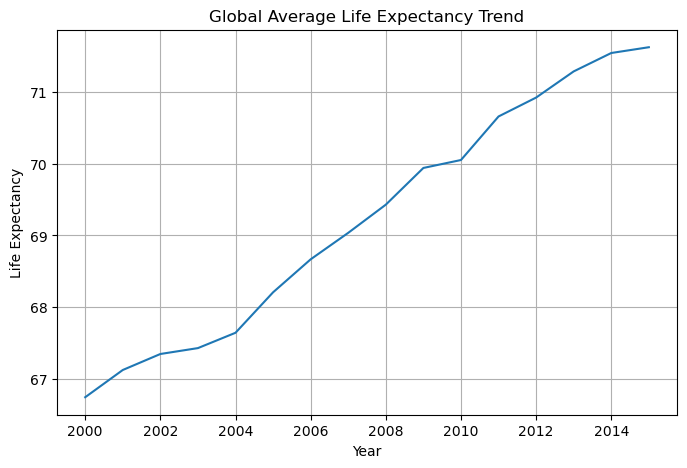

In [28]:
avg_trend = df_model.groupby("Year")["Life_expectancy"].mean()

plt.figure(figsize=(8,5))
avg_trend.plot()
plt.title("Global Average Life Expectancy Trend")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()

In [29]:
cluster_features = [
    "Life_expectancy",
    "Adult_Mortality",
    "BMI",
    "GDP",
    "Alcohol",
    "Schooling",
    "Income_composition_of_resources",
    "HIV_AIDS",
    "Diphtheria",
    "Polio",
    "Hepatitis_B",
    "Total_expenditure",
    "percentage_expenditure"
]

X = df_latest[cluster_features]

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

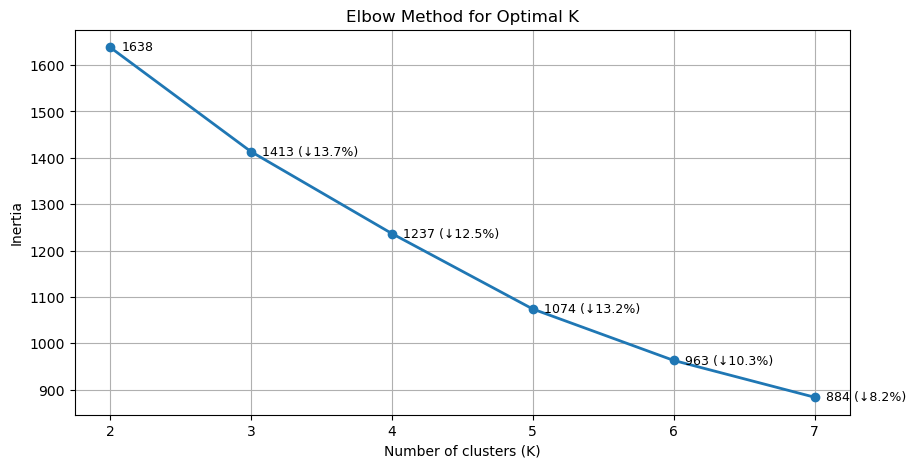

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 8)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K_range, inertia, marker="o", linewidth=2)

for i, (k, val) in enumerate(zip(K_range, inertia)):
    if i == 0:
        label = f"{val:.0f}"
    else:
        prev_val = inertia[i-1]
        pct_change = ((prev_val - val) / prev_val) * 100
        label = f"{val:.0f} (↓{pct_change:.1f}%)"
    
    plt.text(
        k + 0.08,     
        val,           
        label,
        fontsize=9,
        va="center"
    )

plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

In [32]:
from sklearn.metrics import silhouette_score

for k in range(2, 6):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")

K=2, Silhouette Score=0.315
K=3, Silhouette Score=0.265
K=4, Silhouette Score=0.277
K=5, Silhouette Score=0.211


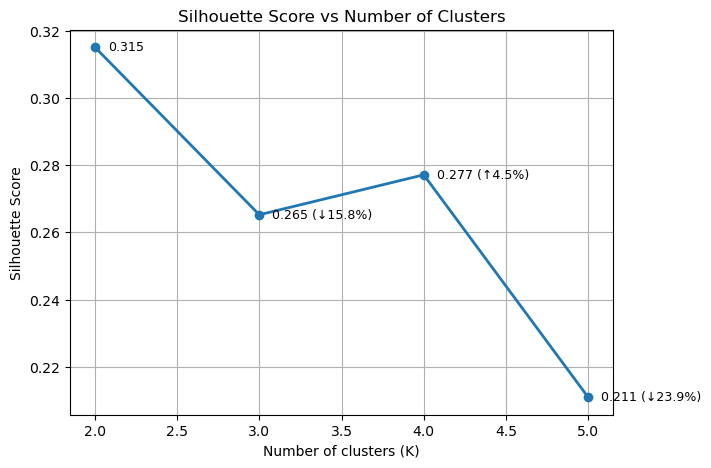

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

K_range = range(2, 6)
sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plot
plt.figure(figsize=(7,5))
plt.plot(K_range, sil_scores, marker="o", linewidth=2)

# Annotate points
for i, (k, val) in enumerate(zip(K_range, sil_scores)):
    if i == 0:
        label = f"{val:.3f}"
    else:
        prev_val = sil_scores[i-1]
        pct_change = ((val - prev_val) / prev_val) * 100
        arrow = "↑" if pct_change > 0 else "↓"
        label = f"{val:.3f} ({arrow}{abs(pct_change):.1f}%)"
    
    plt.text(
        k + 0.08,     # shift text to the right
        val,
        label,
        fontsize=9,
        va="center"
    )

plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()

In [34]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_latest["Cluster"] = kmeans.fit_predict(X_scaled)

In [35]:
cluster_profile = df_latest.groupby("Cluster")[cluster_features].mean().round(2)
cluster_profile

Life_expectancy  Adult_Mortality    BMI      GDP  Alcohol  Schooling  \
Cluster                                                                         
0                  60.69           261.95  32.21  1571.73     3.76      10.33   
1                  77.20           101.65  53.89  9615.49     6.25      14.67   
2                  65.15           208.89  25.65  1832.55     2.32      10.48   

         Income_composition_of_resources  HIV_AIDS  Diphtheria  Polio  \
Cluster                                                                 
0                                   0.54      2.55       32.67  39.81   
1                                   0.79      0.12       94.26  93.37   
2                                   0.56      0.99       85.89  80.25   

         Hepatitis_B  Total_expenditure  percentage_expenditure  
Cluster                                                          
0              32.62               4.79                    3.39  
1              91.23               6.44                    3.44  
2              85.82               5.24                    0.00

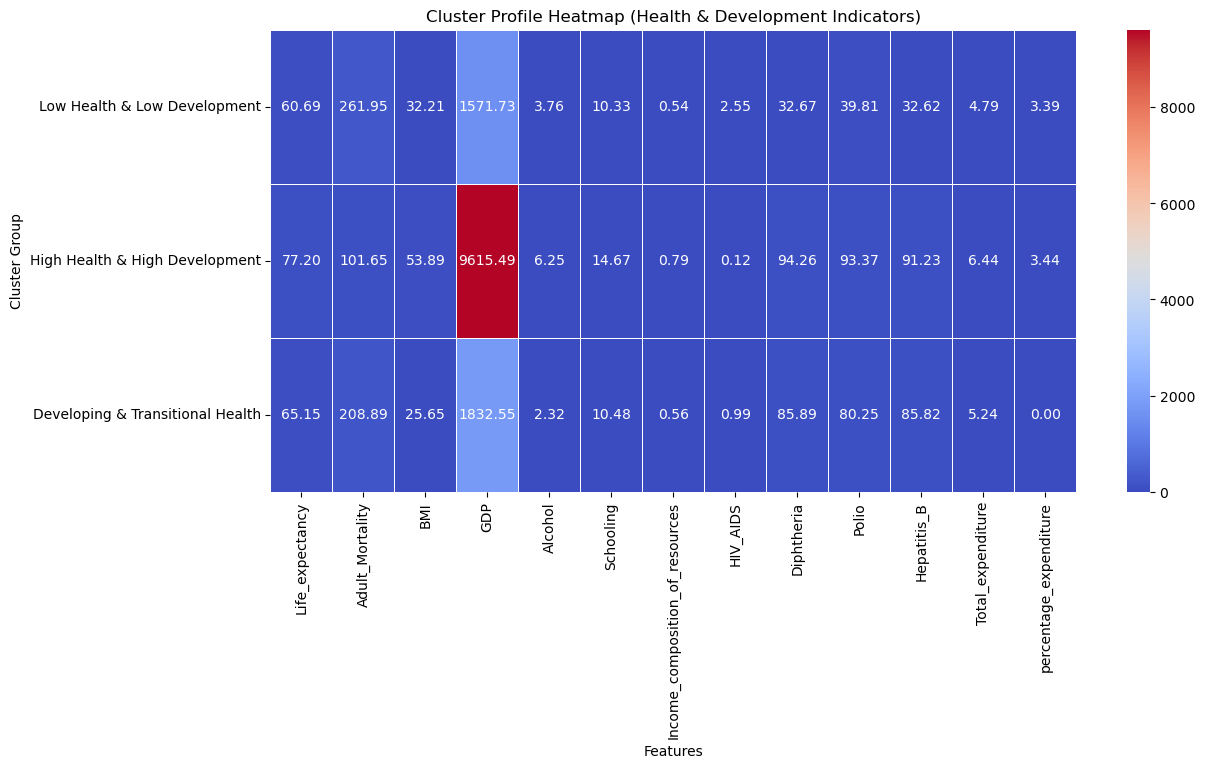

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_names = {
    0: "Low Health & Low Development",
    1: "High Health & High Development",
    2: "Developing & Transitional Health"
}

cluster_profile_named = cluster_profile.copy()
cluster_profile_named.index = cluster_profile_named.index.map(cluster_names)

plt.figure(figsize=(13,6))
sns.heatmap(
    cluster_profile_named,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Cluster Profile Heatmap (Health & Development Indicators)")
plt.ylabel("Cluster Group")
plt.xlabel("Features")
plt.show()

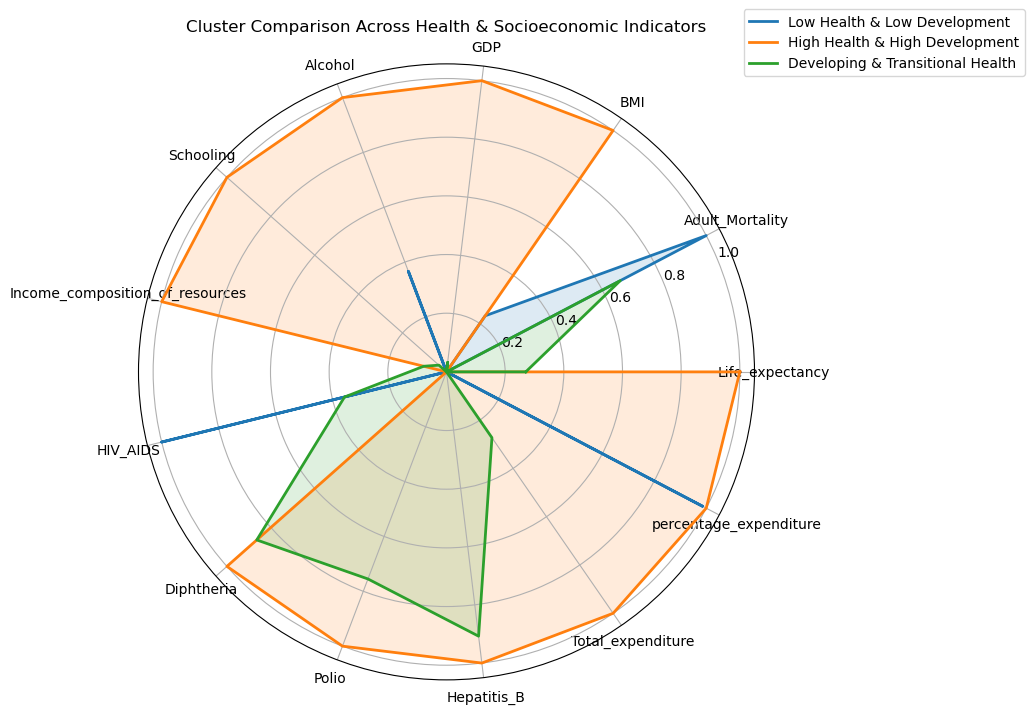

In [37]:
import numpy as np

normalized = (cluster_profile - cluster_profile.min()) / (cluster_profile.max() - cluster_profile.min())
normalized.index = normalized.index.map(cluster_names)

labels = normalized.columns
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.concatenate([angles, [angles[0]]])

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

for cluster in normalized.index:
    values = normalized.loc[cluster].values
    values = np.concatenate([values, [values[0]]])
    ax.plot(angles, values, linewidth=2, label=cluster)
    ax.fill(angles, values, alpha=0.15)

ax.set_thetagrids(angles[:-1] * 180/np.pi, labels)
plt.title("Cluster Comparison Across Health & Socioeconomic Indicators")
plt.legend(loc="upper right", bbox_to_anchor=(1.45,1.1))
plt.show()


In [38]:
cluster_order = (
    df_latest.groupby("Cluster")["Life_expectancy"]
    .mean()
    .sort_values()
    .index
)

cluster_map = {old: new for new, old in enumerate(cluster_order)}
df_latest["Cluster_relabelled"] = df_latest["Cluster"].map(cluster_map)

In [39]:
cluster_order = (
    df_latest.groupby("Cluster")["Life_expectancy"]
    .mean()
    .sort_values()
    .index
)

cluster_map = {old: new for new, old in enumerate(cluster_order)}
df_latest["Cluster_relabelled"] = df_latest["Cluster"].map(cluster_map)

In [40]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(
    X_pca,
    columns=["PC1", "PC2"]
)

df_pca["Cluster"] = df_latest["Cluster"].values
df_pca["Country"] = df_latest["Country"].values

df_pca.head()

PC1       PC2  Cluster              Country
0 -3.268706 -0.364940        0          Afghanistan
1  1.910769  1.054010        1              Albania
2  1.220583  0.662171        1              Algeria
3 -4.045976 -1.130670        0               Angola
4  1.807415  0.013251        1  Antigua and Barbuda

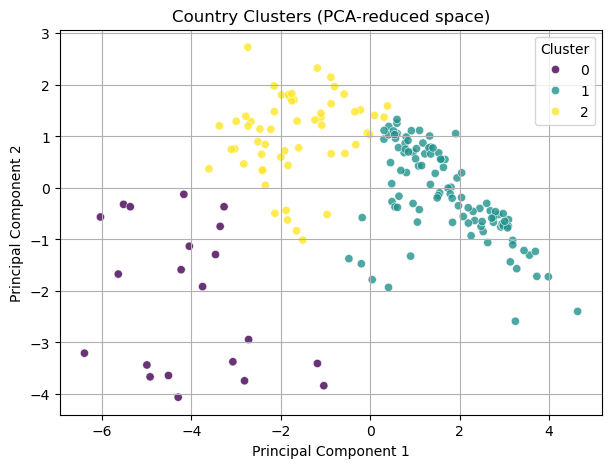

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_pca,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="viridis",
    alpha=0.8
)

plt.title("Country Clusters (PCA-reduced space)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [42]:
country_cluster = df_latest[["Country", "Cluster"]]

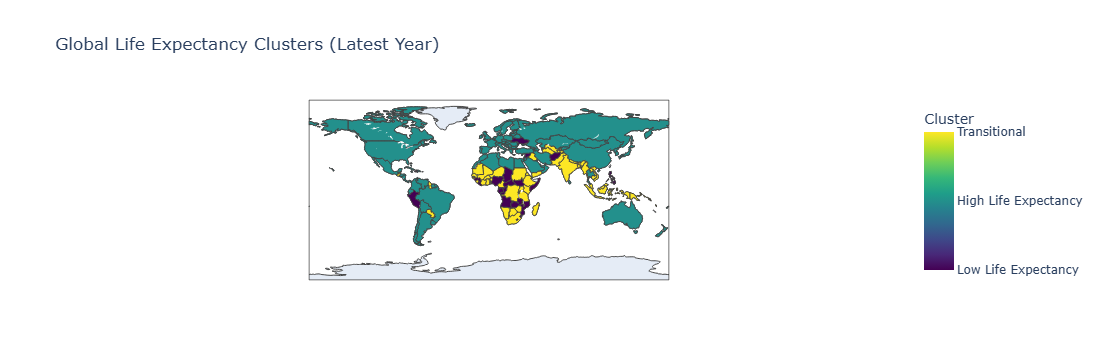

In [43]:
import plotly.express as px

fig = px.choropleth(
    country_cluster,
    locations="Country",
    locationmode="country names",
    color="Cluster",
    color_continuous_scale="Viridis",
    title="Global Life Expectancy Clusters (Latest Year)"
)

fig.update_layout(
    coloraxis_colorbar=dict(
        title="Cluster",
        tickvals=[0, 1, 2],
        ticktext=[
            "Low Life Expectancy",
            "High Life Expectancy",
            "Transitional"
        ]
    )
)

fig.show()

In [44]:
from prophet import Prophet

country = "India"

df_ts = df_model[df_model["Country"] == country][
    ["Year", "Life_expectancy"]
].dropna().sort_values("Year")

df_ts["ds"] = pd.to_datetime(df_ts["Year"], format="%Y")
df_ts["y"] = df_ts["Life_expectancy"]

df_ts = df_ts[["ds", "y"]]
df_ts.head()

ds     y
1201 2000-01-01  62.5
1200 2001-01-01  62.9
1199 2002-01-01  63.3
1198 2003-01-01  63.7
1197 2004-01-01  64.0

In [45]:
model = Prophet()
model.fit(df_ts)

11:11:16 - cmdstanpy - INFO - Chain [1] start processing
11:11:17 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
future = model.make_future_dataframe(periods=5, freq="YE")
forecast = model.predict(future)

forecast[["ds", "yhat"]].tail()

ds       yhat
16 2015-12-31  71.093503
17 2016-12-31  69.389218
18 2017-12-31  70.188993
19 2018-12-31  71.242358
20 2019-12-31  72.603926

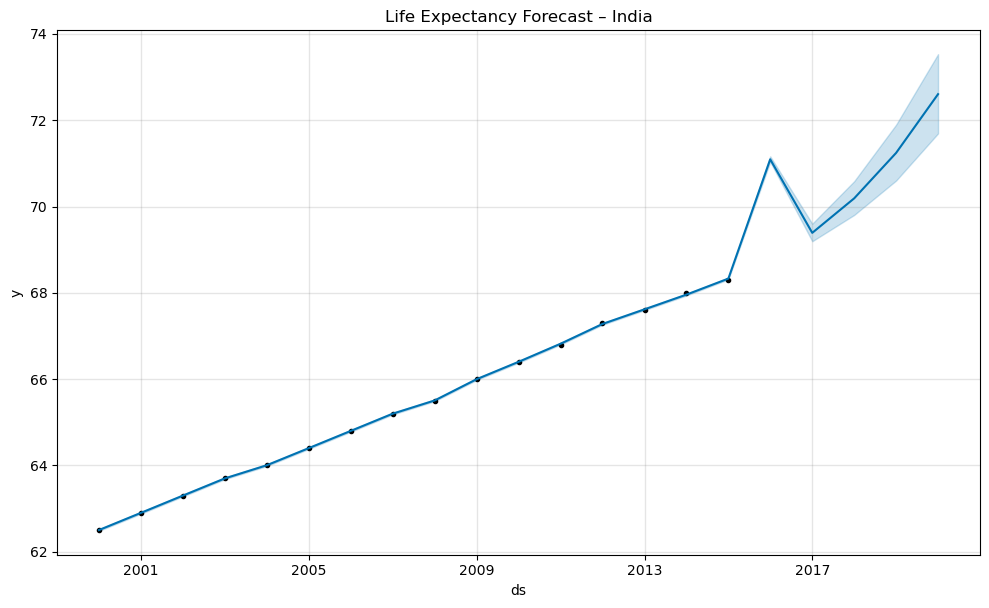

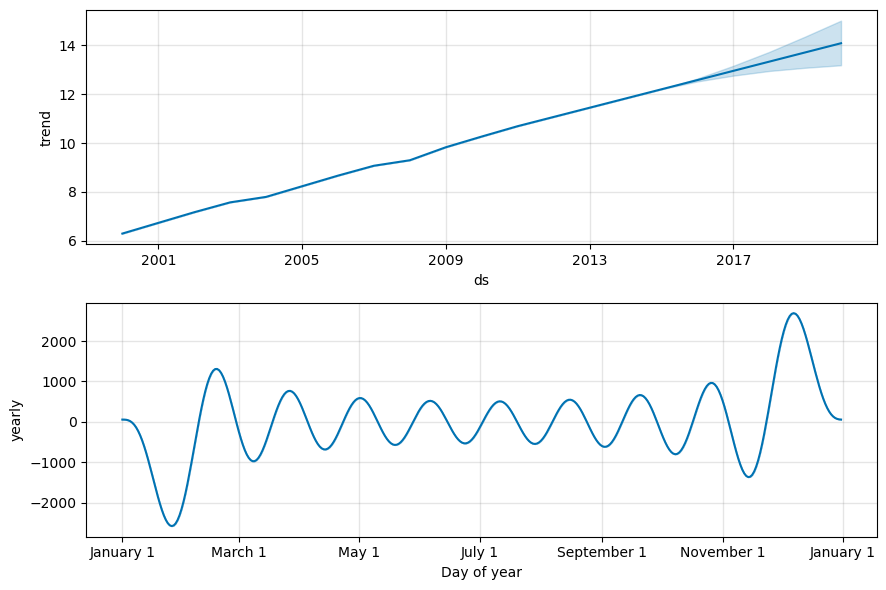

In [47]:
model.plot(forecast)
plt.title(f"Life Expectancy Forecast – {country}")
plt.show()

model.plot_components(forecast)
plt.show()

In [48]:
df_ml = df_model[df_model["Country"] == country].copy()
df_ml = df_ml.sort_values("Year")

df_ml["lag1"] = df_ml["Life_expectancy"].shift(1)
df_ml["lag2"] = df_ml["Life_expectancy"].shift(2)
df_ml["rolling3"] = df_ml["Life_expectancy"].rolling(3).mean()

df_ml = df_ml.dropna()
df_ml.head()

Country  Year  Status  Life_expectancy  Adult_Mortality  Alcohol  \
1199   India  2002       0             63.3            219.0     1.10   
1198   India  2003       0             63.7            216.0     1.19   
1197   India  2004       0             64.0            214.0     1.20   
1196   India  2005       0             64.4            211.0     1.27   
1195   India  2006       0             64.8             28.0     1.37   

      percentage_expenditure  Hepatitis_B  Measles   BMI  ...  HIV_AIDS  \
1199               17.812056         33.0    40044  12.2  ...       0.3   
1198               19.480868         33.0    47147  12.6  ...       0.3   
1197               27.338009          6.0    55443  13.0  ...       0.3   
1196                3.509637          8.0    36711  13.5  ...       0.3   
1195               34.859427          6.0    64185  13.9  ...       0.3   

             GDP    Population  thinness__1-19_years  thinness_5-9_years  \
1199  466.284200  1.898711e+07                  27.4                28.4   
1198  541.135228  1.182785e+07                  27.3                28.3   
1197  621.318377  1.126136e+09                  27.2                28.2   
1196   77.819000  1.144119e+09                  27.2                28.1   
1195  792.259698  1.161978e+09                  27.1                28.0   

      Income_composition_of_resources  Schooling  lag1  lag2   rolling3  
1199                            0.499        8.4  62.9  62.5  62.900000  
1198                            0.505        8.6  63.3  62.9  63.300000  
1197                            0.518        9.2  63.7  63.3  63.666667  
1196                            0.526        9.4  64.0  63.7  64.033333  
1195                            0.536        9.7  64.4  64.0  64.400000  

[5 rows x 23 columns]

In [49]:
train = df_ml.iloc[:-2]
test = df_ml.iloc[-2:]

features = ["Year", "lag1", "lag2", "rolling3"]
target = "Life_expectancy"

In [50]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

model_xgb = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    random_state=42
)

model_xgb.fit(train[features], train[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [51]:
preds = model_xgb.predict(test[features])
mae = mean_absolute_error(test[target], preds)
mae

0.5625900268554673

In [52]:
future_years = []

last_row = df_ml.iloc[-1].copy()

for i in range(1, 6):
    next_year = int(last_row["Year"] + 1)

    pred = model_xgb.predict(pd.DataFrame([{
        "Year": next_year,
        "lag1": last_row["Life_expectancy"],
        "lag2": last_row["lag1"],
        "rolling3": last_row["rolling3"]
    }]))[0]

    future_years.append((next_year, pred))

    last_row["Year"] = next_year
    last_row["lag2"] = last_row["lag1"]
    last_row["lag1"] = pred
    last_row["rolling3"] = (last_row["rolling3"] * 2 + pred) / 3
    last_row["Life_expectancy"] = pred

future_years

[(2016, 67.58741),
 (2017, 67.58741),
 (2018, 67.58741),
 (2019, 67.58741),
 (2020, 67.58741)]

In [53]:
df_model.columns
df_latest[["Country", "Cluster"]].head()
df_model = df_model.merge(
    df_latest[["Country", "Cluster"]],
    on="Country",
    how="left"
)

In [54]:
df_model["Cluster_Name"] = df_model["Cluster"].map(cluster_names)
df_model[["Country", "Year", "Cluster", "Cluster_Name"]].head()

Country  Year  Cluster                  Cluster_Name
0  Afghanistan  2015      0.0  Low Health & Low Development
1  Afghanistan  2014      0.0  Low Health & Low Development
2  Afghanistan  2013      0.0  Low Health & Low Development
3  Afghanistan  2012      0.0  Low Health & Low Development
4  Afghanistan  2011      0.0  Low Health & Low Development

In [55]:
cluster_ts = (
    df_model
    .groupby(["Cluster_Name", "Year"])["Life_expectancy"]
    .mean()
    .reset_index()
)


Forecasting for: Developing & Transitional Health


11:11:19 - cmdstanpy - INFO - Chain [1] start processing
11:11:42 - cmdstanpy - INFO - Chain [1] done processing


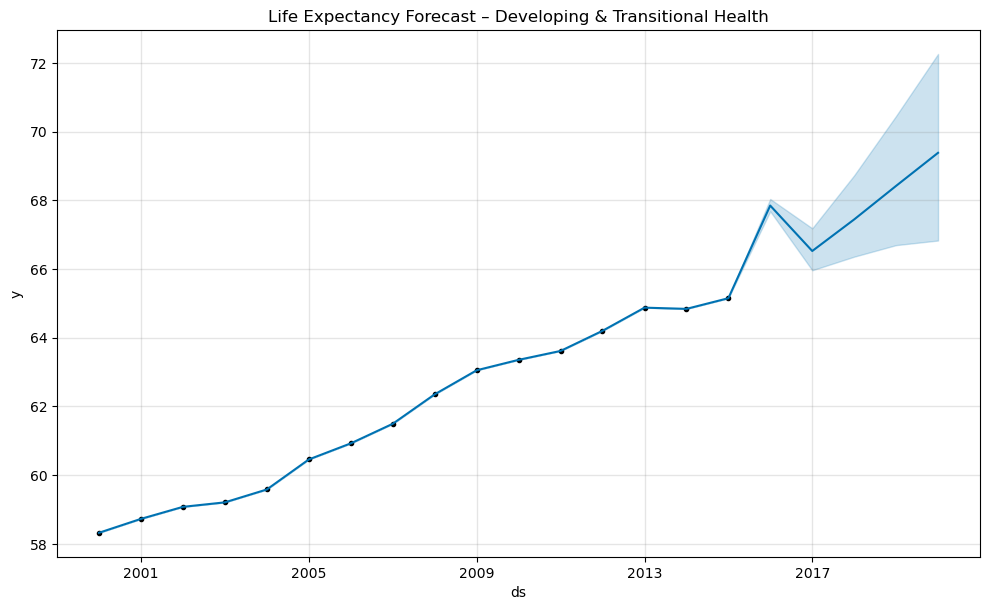

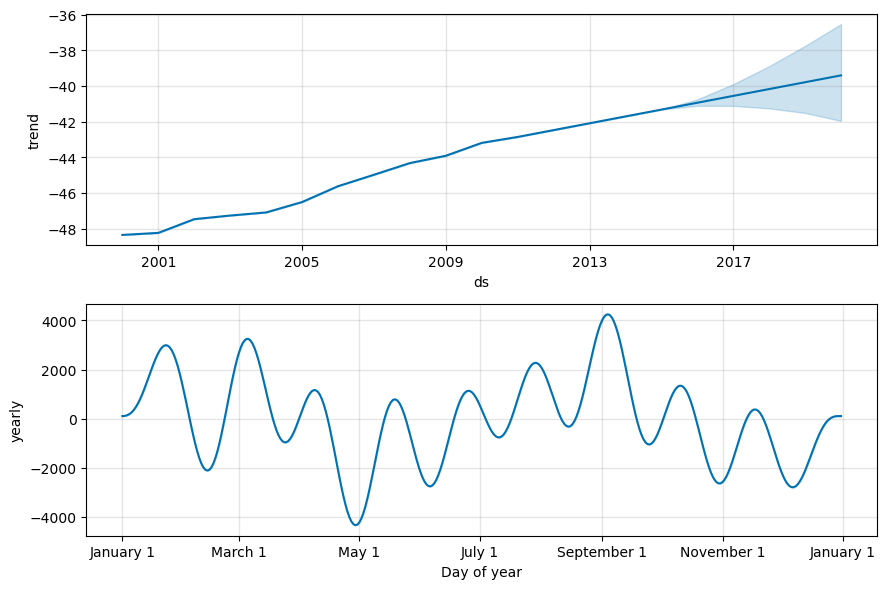


Forecasting for: High Health & High Development


11:11:44 - cmdstanpy - INFO - Chain [1] start processing
11:11:44 - cmdstanpy - INFO - Chain [1] done processing


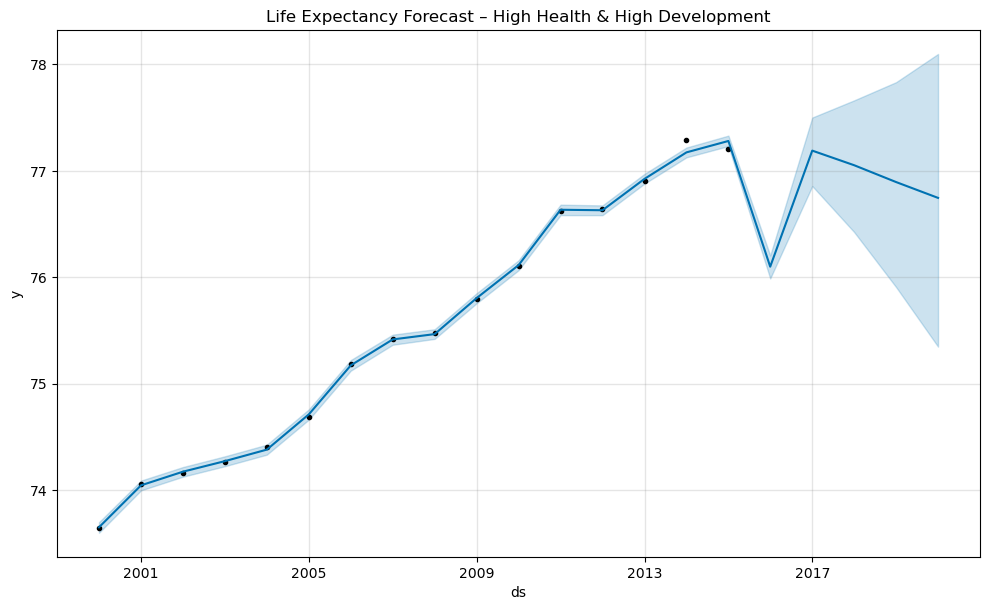

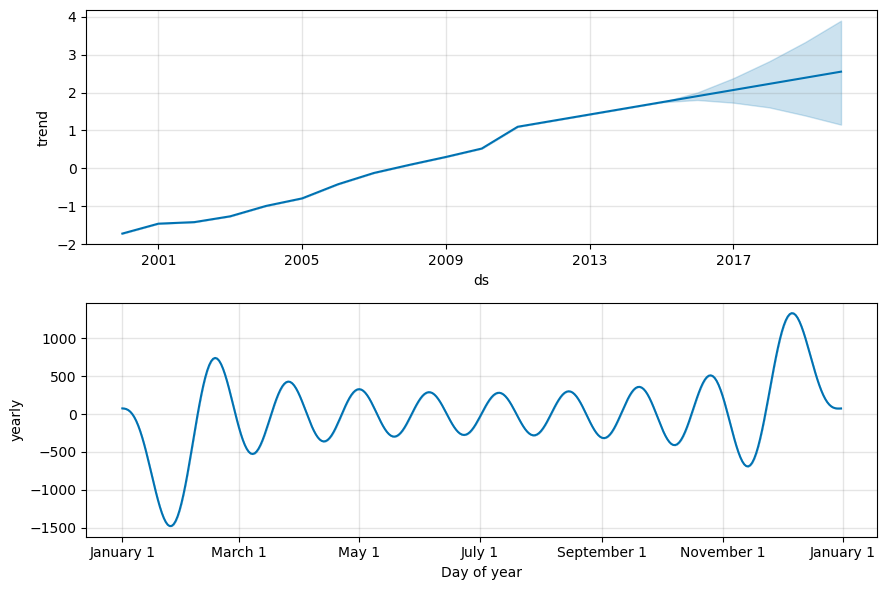


Forecasting for: Low Health & Low Development


11:11:45 - cmdstanpy - INFO - Chain [1] start processing
11:11:46 - cmdstanpy - INFO - Chain [1] done processing


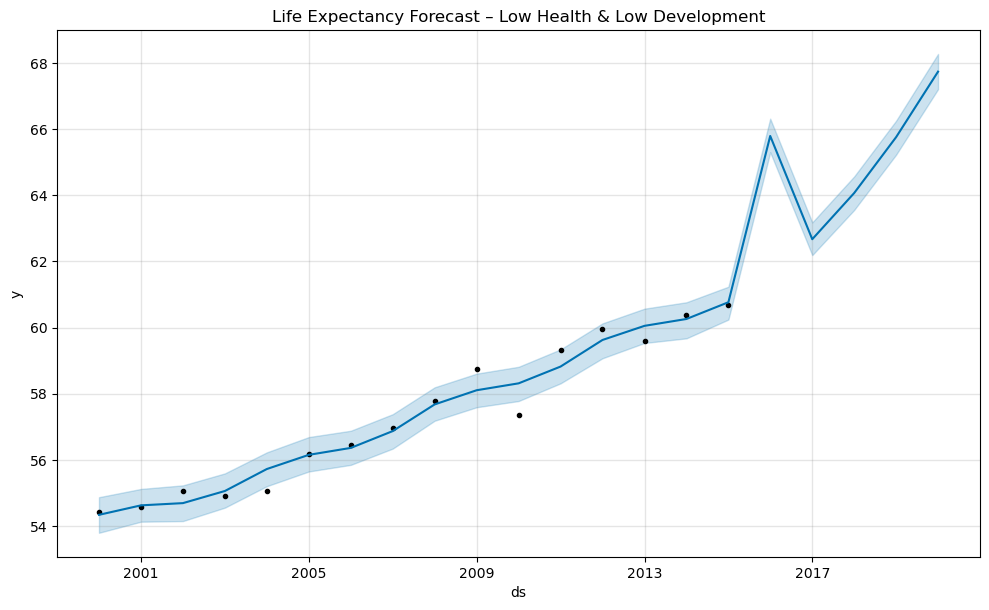

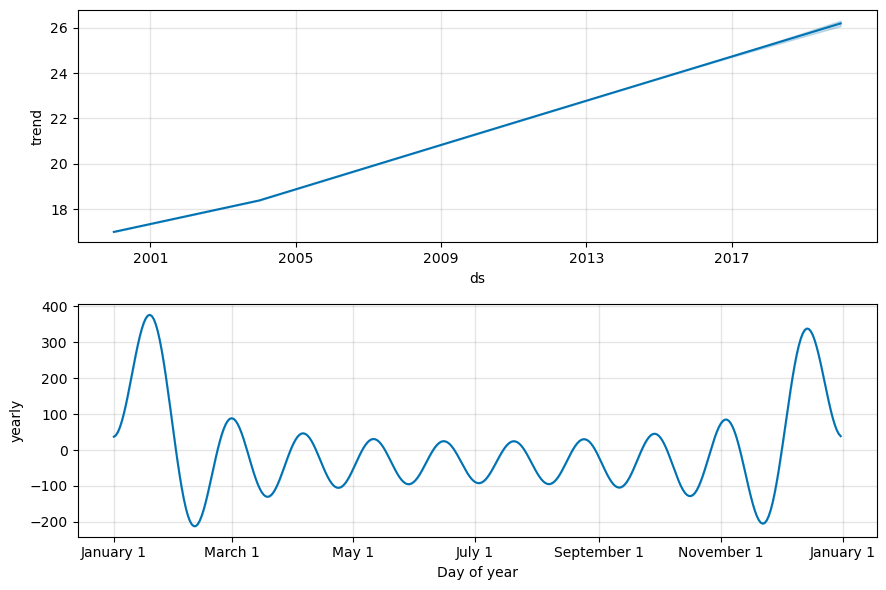

Cluster  Current_Life_Expectancy  \
0  Developing & Transitional Health                    65.15   
1    High Health & High Development                    77.28   
2      Low Health & Low Development                    60.76   

   Future_Life_Expectancy  Growth  
0                   69.38    4.23  
1                   76.74   -0.53  
2                   67.74    6.97

In [56]:
from prophet import Prophet
import matplotlib.pyplot as plt

def forecast_cluster(df, cluster_name, periods=5):
    ts = df[df["Cluster_Name"] == cluster_name][["Year", "Life_expectancy"]]
    
    if ts.shape[0] < 2:
        print(f"Not enough data for {cluster_name}")
        return None
    
    ts = ts.sort_values("Year")
    ts["ds"] = pd.to_datetime(ts["Year"], format="%Y")
    ts["y"] = ts["Life_expectancy"]
    ts = ts[["ds", "y"]]

    model = Prophet()
    model.fit(ts)

    future = model.make_future_dataframe(periods=periods, freq="YE")
    forecast = model.predict(future)

    # Plot
    model.plot(forecast)
    plt.title(f"Life Expectancy Forecast – {cluster_name}")
    plt.show()

    model.plot_components(forecast)
    plt.show()

    return forecast

cluster_forecasts = {}

for cluster in cluster_ts["Cluster_Name"].unique():
    print(f"\nForecasting for: {cluster}")
    forecast = forecast_cluster(cluster_ts, cluster, periods=5)
    cluster_forecasts[cluster] = forecast

growth_summary = []

for cluster, forecast in cluster_forecasts.items():
    if forecast is None:
        continue
        
    past = forecast.iloc[-6]["yhat"]
    future = forecast.iloc[-1]["yhat"]
    
    growth_summary.append({
        "Cluster": cluster,
        "Current_Life_Expectancy": round(past, 2),
        "Future_Life_Expectancy": round(future, 2),
        "Growth": round(future - past, 2)
    })

growth_df = pd.DataFrame(growth_summary)
growth_df


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26856\1428097167.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




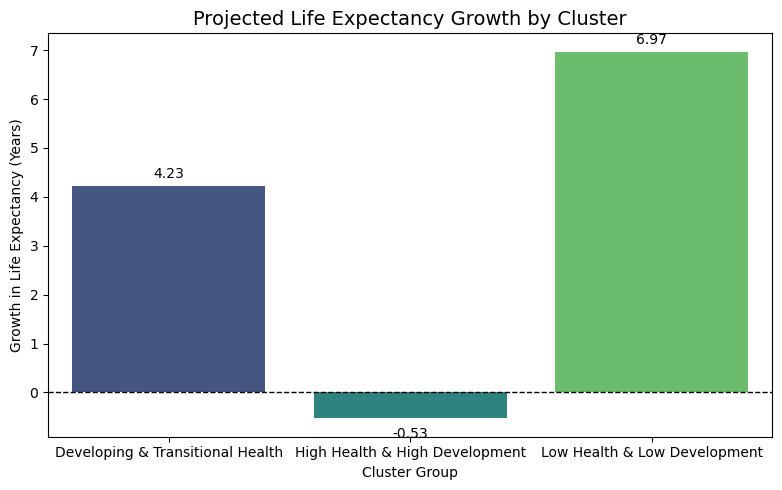

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

growth_df = growth_df.copy()

plt.figure(figsize=(8,5))
sns.barplot(
    data=growth_df,
    x="Cluster",
    y="Growth",
    palette="viridis"
)

# Reference line for zero growth
plt.axhline(0, color="black", linestyle="--", linewidth=1)

plt.title("Projected Life Expectancy Growth by Cluster", fontsize=14)
plt.xlabel("Cluster Group")
plt.ylabel("Growth in Life Expectancy (Years)")

# Add value labels on bars
for i, row in growth_df.iterrows():
    plt.text(
        i,
        row["Growth"] + (0.15 if row["Growth"] >= 0 else -0.4),
        f'{row["Growth"]:.2f}',
        ha="center",
        fontsize=10
    )

plt.tight_layout()
plt.show()

In [94]:
from prophet import Prophet
import pandas as pd

def forecast_country_life_expectancy(df, country, periods=10):
    ts = (
        df[df["Country"] == country][["Year", "Life_expectancy"]]
        .dropna()
        .sort_values("Year")
    )

    if ts.shape[0] < 8:
        raise ValueError(f"Not enough data for {country}")

    ts["ds"] = pd.to_datetime(ts["Year"], format="%Y")
    ts["y"] = ts["Life_expectancy"]
    ts = ts[["ds", "y"]]

    model = Prophet(
        interval_width=0.95,
        yearly_seasonality=False,
        changepoint_prior_scale=0.1
    )

    model.fit(ts)

    future = model.make_future_dataframe(periods=periods, freq="Y")
    forecast = model.predict(future)

    return forecast

def extract_target_year_forecast(forecast, target_year=2025):
    forecast["year"] = forecast["ds"].dt.year

    if target_year not in forecast["year"].values:
        raise ValueError(
            f"Year {target_year} not found in forecast. "
            f"Available years: {forecast['year'].max()}"
        )

    row = forecast.loc[forecast["year"] == target_year].iloc[0]

    return {
        "Predicted": round(row["yhat"], 2),
        "Lower_95": round(row["yhat_lower"], 2),
        "Upper_95": round(row["yhat_upper"], 2),
    }

# Test for one country
country = "India"

forecast_india = forecast_country_life_expectancy(
    df=df_model,
    country=country,
    periods=15
)

forecast_2025_india = extract_target_year_forecast(
    forecast_india,
    target_year=2025
)

forecast_2025_india

19:07:03 - cmdstanpy - INFO - Chain [1] start processing
19:07:03 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ADMIN\Anaconda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



{'Predicted': 72.42, 'Lower_95': 69.4, 'Upper_95': 75.3}

In [59]:
forecast_india["ds"].dt.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029])

In [104]:
from prophet import Prophet
import pandas as pd

def forecast_country_life_expectancy(
    df,
    country,
    target_year=2022,
    interval_width=0.99,
    min_points=8
):
    ts = (
        df[df["Country"] == country][["Year", "Life_expectancy"]]
        .dropna()
        .sort_values("Year")
    )

    if ts.shape[0] < min_points:
        raise ValueError(f"Not enough data for {country}")

    ts["ds"] = pd.to_datetime(ts["Year"], format="%Y")
    ts["y"] = ts["Life_expectancy"]
    ts = ts[["ds", "y"]]

    model = Prophet(
        interval_width=interval_width,
        yearly_seasonality=False,
        changepoint_prior_scale=0.1
    )
    model.fit(ts)

    future = model.make_future_dataframe(
        freq="Y",
        periods=0
    )
    future = future[future["ds"] <= pd.Timestamp(f"{target_year}-12-31")]

    if future["ds"].dt.year.max() < target_year:
        future = pd.concat([
            future,
            pd.DataFrame({
                "ds": pd.date_range(
                    start=future["ds"].max() + pd.offsets.YearEnd(),
                    end=f"{target_year}-12-31",
                    freq="Y"
                )
            })
        ])

    forecast = model.predict(future)
    forecast["year"] = forecast["ds"].dt.year

    row = forecast.loc[forecast["year"] == target_year].iloc[-1]

    return {
        "Country": country,
        "Predicted_Life_Expectancy": round(row["yhat"], 2),
        "Lower_99_CI": round(row["yhat_lower"], 2),
        "Upper_99_CI": round(row["yhat_upper"], 2),
    }

countries = ["India", "Colombia", "Japan"]

results = []

for country in countries:
    results.append(
        forecast_country_life_expectancy(
            df=df_model,
            country=country,
            target_year=2029,
            interval_width=0.99
        )
    )

forecast_2022_df = pd.DataFrame(results)
forecast_2022_df

19:17:39 - cmdstanpy - INFO - Chain [1] start processing
19:17:40 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ADMIN\Anaconda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26856\125388643.py:42: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

19:17:40 - cmdstanpy - INFO - Chain [1] start processing
19:17:40 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ADMIN\Anaconda\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_26856\125388643.py:42: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

19:17:41 - cmdstanpy - INFO - Chain [1] start processing
19:17:41 - cmdstanpy - INFO - Chain [1]

Country  Predicted_Life_Expectancy  Lower_99_CI  Upper_99_CI
0     India                      73.90        67.48        80.23
1  Colombia                      77.02        45.15       110.40
2     Japan                      87.51        76.10       101.31